## Define bra y kets

Define latex commands for bra and kets

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# rz_lib

In order to develop the **Benchmark Test Case** for **QPE** we have developed the **rz_library** python package that have all mandatory functions for computing eigenvalues of a  $Rz^{\otimes n} (\vec{\theta})$ operator theoretically and usign Atos myqlm simulation library. In this notbook we explain the **QPE** for the $Rz^{\otimes n} (\vec{\theta})$ and shows how to use the **rz_library** package

## 1. Quantum Phase Estimation

Let a $n$ qubit unitary operator $\mathcal{Q}$ and let $\ket{\Psi_j}$ an eigenstate of operator $\mathcal{Q}$. The eigenvalue of eigenstate $\ket{\Psi_j}$ for $\mathcal{Q}$ will be:

$$\mathcal{Q}\ket{\Psi_j} = e^{2\pi i \lambda_j} \ket{\Psi_j}$$

Quantum Phase Estimation, **QPE**, allow us, given an operator $\mathcal{Q}$ and an eigenstate $\ket{\Psi_j}$, compute the correspondent eigenvalue $\lambda_j$ using following circuit:

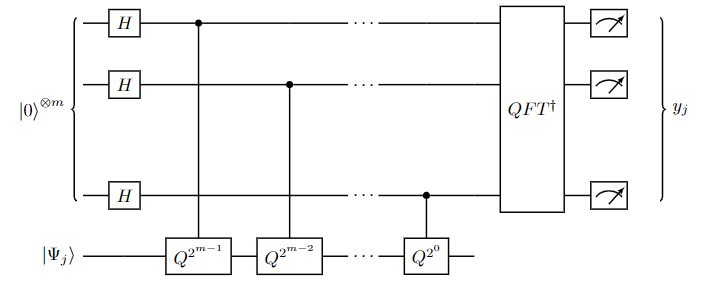

The measurement $y_j$ can be related with $\lambda_j$ by:

$$\lambda_j = \frac{y_j}{2^m}$$

It can be shown that if the eigenvalue $\lambda_j$ can be mapped to  $\frac{y_j}{2^m}$ then the probability of getting the correct eigenvalue is 100%. If this is not posible then it can be shown that the measured $\lambda^{Meas}_j$ have an error with respect to the true value $\lambda^{True}_j$ of:

$$|\lambda^{Meas}_j - \lambda^{True}_j| \leq \frac{1}{2^m}$$

with a probability higher than $80\%$. 

If all eigenstates of the operator $\mathcal{Q}$ are know we can compute all the correspondent eigenvalues using the aforementioned circuit for each eigenstate.

## 2. Quantum Phase Estimation for $Rz^{\otimes n} (\vec{\theta})$

In order to test the performance of a quantum computing system for executing the **QPE** we are going to compute the eigenvalues of the Kronecker product of $R_z$ gates, $Rz^{\otimes n} (\vec{\theta})$. 

The reasons for selecting the $Rz^{\otimes n} (\vec{\theta})$ operator as a Benchmark Test Case are:

1. The eigenvectors of the $Rz^{\otimes n} (\vec{\theta})$ are the elements of the computational basis.
2. The eigenvalues of the $Rz^{\otimes n} (\vec{\theta})$ are computable in a very easy way.

Do some maths for justify this reasons. 


### 1 qubit 

The $R_z(\theta)$ gate have the following matrix representation:


$$
R_z (\theta) = 
\begin{equation}
    \begin{pmatrix}
    e^{-i\frac{\theta}{2}} & 0\\
    0 & e^{i\frac{\theta}{2}}
    \end{pmatrix}
\end{equation}
$$

A more suitable formulation is using Dirac notation:

$$R_z = \ket{0}\bra{0} e^{-i\frac{\theta}{2}} + \ket{1}\bra{1} e^{i\frac{\theta}{2}}$$

For this operator the the eigenvectors are $\ket{0}$ with eigenvalue $e^{-i\frac{\theta}{2}}$ and $\ket{1}$ with eigenvalue $e^{i\frac{\theta}{2}}$.

If we use the **QPE** with the $R_z$ operator then following equality should be taking into account for computing the correct eigenvalues:

$$2 \pi \lambda = \frac{\theta}{2}$$


### 2 qubit 

Now we are going to compute the correspondent kronecker product for 2 qbuits $R_z(\theta_1) \otimes R_z(\theta_2)$:

$$R_z(\theta_1) \otimes R_z(\theta_2) = \ket{00}\bra{00} e^{-i\frac{\theta_1 + \theta_2}{2}} + \ket{01}\bra{01} e^{-i\frac{\theta_1 - \theta_2}{2}} + \ket{10}\bra{10} e^{-i\frac{-\theta_1 + \theta_2}{2}} + \ket{11}\bra{11} e^{-i\frac{-\theta_1 - \theta_2}{2}}$$

As can be seen the eigenvectors of the $R_z(\theta_1) \otimes R_z(\theta_2)$ operator are the elements of the computational basis.

**Be aware** that if we want to use the **QPE** for this operator then:

* $2\pi \lambda_{\ket{00}} = - \frac{\theta_1 + \theta_2}{2}$
* $2\pi \lambda_{\ket{01}} = - \frac{\theta_1 - \theta_2}{2}$
* $2\pi \lambda_{\ket{10}} = - \frac{-\theta_1 + \theta_2}{2}$
* $2\pi \lambda_{\ket{11}} =  \frac{\theta_1 + \theta_2}{2}$


### 3 qubit 


For a 3 qbit operator: $R_z(\theta_1) \otimes R_z(\theta_2) \otimes R_z(\theta_3)$ the operator is:

$$R_z(\theta_1) \otimes R_z(\theta_2) \otimes R_z(\theta_3)= \ket{000}\bra{000} e^{-i\frac{\theta_1 + \theta_2 + \theta_3}{2}} + \ket{001}\bra{001} e^{-i\frac{\theta_1 + \theta_2 - \theta_3}{2}} + \ket{010}\bra{010} e^{-i\frac{\theta_1 -  \theta_2 + \theta_3}{2}} + \ket{011}\bra{011} e^{-i\frac{\theta_1 -  \theta_2 - \theta_3}{2}} + \ket{100}\bra{100} e^{-i\frac{-\theta_1 + \theta_2 + \theta_3}{2}} + \ket{101}\bra{101} e^{-i\frac{-\theta_1 + \theta_2 - \theta_3}{2}} + \ket{110}\bra{110} e^{-i\frac{-\theta_1 - \theta_2 + \theta_3}{2}} +\ket{111}\bra{111} e^{-i\frac{-\theta_1 - \theta_2 - \theta_3}{2}} $$


Again the eigenvectors are the elements of the computational basis. We have to **be aware** when using  **QPE**:

* $2\pi \lambda_{\ket{ijk}} = - \frac{(-1)^i\theta_1 + (-1)^j\theta_2 + (-1)^k\theta_2}{2}$


### n qubit 



This can be easily generalizable for a $n$ qbits kronecker product: $R_z^{\otimes n} (\vec{\theta})$.

Additionally the eigenvalues for each eigenvector have an easy computation recipe: for a system with $n$ qubits the eigenvalue for an eigenstate $\ket{i_0i_1i_2 \cdots i_n}$, with $i_j=\{0,1\}$, of a $Rz^{\otimes n} (\vec{\theta})$ operator have following eigenvalue:

$$2\pi \lambda_{\ket{i_0, i_1, \cdots , i_n}} = - \frac{\sum_{j=0}^{n} (-1)^{i_j} \theta_j}{2}$$

**BE AWARE**

The $\lambda_{\ket{i_0, i_1, \cdots , i_n}}$ presented here will be the same that $\lambda_j$ presented in the **Quantum Phase Estimation** section

## 3. The rz_lib

The **rz_library** python package, inside **QPE** module, have all functions needed to compute, theoretically and using **QPE** algorithm (simulated using Atos myqlm), the eigenvalues of a generic $R_z^{\otimes n} (\vec{\theta})$.

In [ ]:
import sys
sys.path.append('../../QPE')
import rz_lib

### 3.1. Theoretical Eigenvalues

The **rz_eigv** function from *rz_lib* allows to compute the complete eigenvalues of a generic $R_z^{\otimes n} (\vec{\theta})$ operator for an input list of angles. In order to understand the package we are going to use two types of list of angles:

1. A list with the same angle for all the qubits, set to $\frac{\pi}{2}$.
2. A list of different random angles

In [ ]:
n_qbits = 7
#Angle pi/2
theta_same = [np.pi / 2.0 for i in range(n_qbits)]
print('Same Angles: {}'.format(theta_same))
theta_diff = [np.pi * np.random.random() for i in range(n_qbits)]
print('Different Angles: {}'.format(theta_diff))

Now we ca use the **rz_eigv** function for computing the desired eigenvalues.

In [ ]:
eigv_theta_same = rz_lib.rz_eigv(theta_same)
eigv_theta_diff = rz_lib.rz_eigv(theta_diff)

Depending of the angles of the $R_z^{\otimes n}$ operator the eigenvalues can be degenerated!

In [ ]:
non_repeated = set(eigv_theta_same['Eigenvalues'])
print("Number of eigenvalues: {}. Not repeated ones: {}".format(len(eigv_theta_same), len(non_repeated)))

In [ ]:
non_repeated = set(eigv_theta_diff['Eigenvalues'])
print("Number of eigenvalues: {}. Not repeated ones: {}".format(len(eigv_theta_diff), len(non_repeated)))

Once the theoretical eigenvalues are found we need to create the correspondent histogram of the eigenvalues between $[0, 1]$ and with fixed discretization that will be given by the number of auxiliary qubits that will be used for computing the **QPE** (the $m$ qubit register in the **QPE** showed at the begining of the notebook). This should be done for a direct comparing between the theoretical results and the results of the **QPE**.


In the **QPE** we can measure the different eigenvalues of the input unitary operator but the precision of the meaturement will be given by the $m$ auxiliar qbit register. So the output of the **QPE** will be a histogram between $[0,1]$ with $2^m$ bins. In each bin the histogram will give us the frecuency of eigenvalues that will be inside it. 

For computing the correspondet histogram the **make_histogram** from *rz_library* can be used. The inputs will be the therotical computed eigenvalues and a discretization parameter (that must be equal to the $m$ that we are going to use for the **QPE**)


In [ ]:
auxiliar_qbuits = 10
hist_theta_same = rz_lib.make_histogram(
    eigv_theta_same['Eigenvalues'], auxiliar_qbuits)
hist_theta_diff = rz_lib.make_histogram(
    eigv_theta_diff['Eigenvalues'], auxiliar_qbuits)
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'], 'o-')
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'], 'o-')
plt.xlabel(r'$\lambda$')
plt.xlabel('Probability')
plt.legend(['Same angle', 'Different Angles'])

If we select a different discretization the form of the distribution can be different

In [ ]:
auxiliar_qbuits = 4
hist_theta_same = rz_lib.make_histogram(
    eigv_theta_same['Eigenvalues'], auxiliar_qbuits)
hist_theta_diff = rz_lib.make_histogram(
    eigv_theta_diff['Eigenvalues'], auxiliar_qbuits)
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'], 'o-')
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'], 'o-')
plt.xlabel(r'$\lambda$')
plt.xlabel('Probability')
plt.legend(['Same angle', 'Different Angles'])

### 3.2 QPE eigenvalue computation.

Now we need to compute the eigenvalues using the **QPE** algorithm. This will be done using Atos myqlm software library. 

For creating the corresponding circuit we can use the **rz_angles** function from *rz_lib*

In [ ]:
rz_gate_same = rz_lib.rz_angles(theta_same)
rz_gate_diff = rz_lib.rz_angles(theta_diff)

In [ ]:
%qatdisplay rz_gate_same --svg --depth 1

In [ ]:
%qatdisplay rz_gate_diff --svg --depth 1

For executing the **QPE** we can use **qpe_rz_qlm** functions that creates the complete mandatory circuit, execute it and post-procces de output to a suitable form

#### Computing the number of shots.

The main problem is computing the number of shots. In general, we want to have for each measured eigenvalue a number of shots enough for having a good statistic. But if the eigenvalues are degenerated it could happend that the most degeneracy eigenvalues will be obtained more frequently than others. Main problem is for eigenvalues with lower degeneracy the number of shots can be not enough for having a good statistic. 

So we are going to execute following strategy:

1. We are going to compute the probability of getting the lowest degeneracy eigenvalue from all the posible theoretical eigenvalues: $p_{lde}$.
2. The number of shots will be equal:

$$\text{shots} = \lceil\frac{1000}{0.81 * p_{lde}}\rceil$$

This is because we want to have for each obtained eigenvalue near of 1000 measures such that the error with respect to the theoretical value will be lower than the discretization ($\frac{1}{2^{m}}$).

This computation can be done with *computing_shots* function

In [ ]:
same_shots = rz_lib.computing_shots(eigv_theta_same)
print("Number of shots for same angles: {}".format(same_shots))
diff_shots = rz_lib.computing_shots(eigv_theta_diff)
print("Number of shots for different angles: {}".format(diff_shots))

Now we can compute the eigenvalues using **QPE**

The *qpe_rz_qlm* function from **rz_qlm** script creates the atos qlm implementation of the **QPE** circuit for a $R_z^{\otimes n}$ operator and solves the circuit providing the different eigenvalues ($\lambda_j$). The mandatory inputs are:

* angles : list. List with the angles that are applied to each qubit of the circuit
* auxiliar_qbits_number : int. Number of auxiliar qubits for doing QPE.

The function returns a pandas dataframe with the distribution of eigenvalues obtained.


* lambda : lamda eigenvalue of the correspondent state
* Probability : Probability of getting the correspondent state

The format of the pandas is compatible with the pandas dataframe returned by *make_histogram* for doing direct comparison!

**BE AWARE**

The ordering of the **States** columns is the least significant bit at the right (it corresponds to the column labelled as **Int_lsb**)

In [ ]:
auxiliar_qbuits = 10
# Theorical distribution
hist_theta_same = rz_lib.make_histogram(
    eigv_theta_same['Eigenvalues'], auxiliar_qbuits)
# QPE dstribution
pdf_qlm_rz_same, qpe_object_ = rz_lib.qpe_rz_qlm(
    theta_same, 
    auxiliar_qbits_number=auxiliar_qbuits, 
    shots=same_shots
)

In [ ]:
# QPE circuito
c = qpe_object_.circuit
%qatdisplay c --svg

In [ ]:
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'], 'o-')
plt.plot(pdf_qlm_rz_same['lambda'], pdf_qlm_rz_same['Probability'], 'o-')

In [ ]:
# As can be seen each eigenvalue is measured near 100 times
plt.plot(hist_theta_same['lambda'], hist_theta_same['Probability'] * same_shots , 'o-')
plt.xlabel('Eigenvalue')
plt.ylabel('Counts')

In [ ]:
auxiliar_qbuits = 10
# Theorical distribution
hist_theta_diff = rz_lib.make_histogram(
    eigv_theta_diff['Eigenvalues'], auxiliar_qbuits)
# QPE dstribution
pdf_qlm_rz_diff, qpe_object = rz_lib.qpe_rz_qlm(
    theta_diff, 
    auxiliar_qbits_number=auxiliar_qbuits, 
    shots=diff_shots)

In [ ]:
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'], 'o-')
plt.plot(pdf_qlm_rz_diff['lambda'], pdf_qlm_rz_diff['Probability'], 'o-')

In [ ]:
plt.plot(hist_theta_diff['lambda'], hist_theta_diff['Probability'].cumsum(), 'o-')
plt.plot(pdf_qlm_rz_diff['lambda'], pdf_qlm_rz_diff['Probability'].cumsum(), 'o-')

In [ ]:
plt.plot(pdf_qlm_rz_diff['lambda'], pdf_qlm_rz_diff['Probability'] * diff_shots , 'o-')
plt.xlabel('Eigenvalue')
plt.ylabel('Counts')

In this case it is more difficult to see if each eigenvalue was measured near of 100 times. So we need to test it explicitely

In [ ]:
for i in set(eigv_theta_diff['Eigenvalues']):
    pdf = pdf_qlm_rz_diff
    # We compute the error between the measured eigenvalue 
    # and the theoretical one
    pdf['Error'] = np.abs(pdf['lambda'] - i)
    # We test the number of measures whose error is lower than 
    # discretization  precision
    print(
        sum(pdf[pdf['Error'] < 2/(2**auxiliar_qbuits)]['Probability'])\
        * diff_shots
    )

As can be seen we have near 1000 measures that verify the error condition